# Examples from An Exploration of Parameter Duality in Statistical Inference

by Suzanne Thornton and Minge Xie

Published in *Philosophy of Science* (2024), 91, 1488–1497 doi:[10.1017/psa.2023.174](https://doi.org/10.1017/psa.2023.174) 





### Notebook setup

In [1]:
import numpy as np
from scipy.stats import bernoulli
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import norm

In [2]:
# Figures setup
import matplotlib.pyplot as plt
import seaborn as sns
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    style="whitegrid",
    rc={'figure.figsize': (7, 2)},
)

<Figure size 640x480 with 0 Axes>

In [3]:
# simple float __repr__
np.set_printoptions(legacy='1.25')

In [4]:
%pip install -q ministats

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Helper functions
from ministats import hdi_from_grid
from ministats import hdi_from_rv
from ministats import plot_pdf

## Example 2.1

### Player 2

Suppose the second participant in Bayes’s billiard table experiment is told that out of their 𝑛=14
rolls, ball 𝑂 has landed to the left of ball 𝑊 three times. The location of ball 𝑊 , known only to the first participant, is 𝜃=0.34 units from one edge of the billiard table. Player 2 decides to use a Bayesian approach and characterizes their uncertainty about 𝜃 with a `Beta(0.5,2)` prior distribution.

In [6]:
# Observed data
y = 3   # number of times fall to the left of W
n = 14  # total number of throws

#### Approach 1: grid approximation

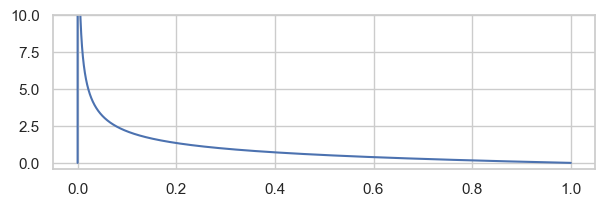

In [7]:
# prior
thetas = np.linspace(0, 1, 1_000_000)
prior2 = beta(a=0.5, b=2).pdf(thetas)
prior2[0] = 0  # to avoid `inf`
sns.lineplot(x=thetas, y=prior2).set_ylim([-0.4,10]);

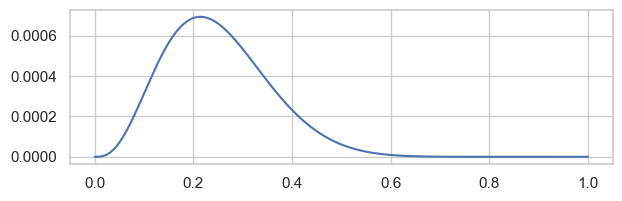

In [8]:
likelihood = thetas**y * (1-thetas)**(n-y)
sns.lineplot(x=thetas, y=likelihood);

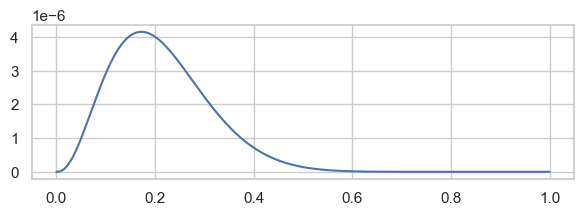

In [9]:
# posterior
numerator2 = likelihood * prior2
posterior2 = numerator2 / np.sum(numerator2)
sns.lineplot(x=thetas, y=posterior2);

In [10]:
hdi_from_grid(thetas, posterior2, hdi_prob=0.95)

[0.04124504124504124, 0.4034594034594034]

#### Approach 2: analytical formula

In [11]:
rvPrior2 = beta(a=0.5, b=2)
rvPosterior2 = beta(a=0.5+y, b=2+n-y)

# plot_pdf(rvPosterior2, xlims=[0,1]);
hdi_from_rv(rvPosterior2, hdi_prob=0.95)

[0.04136631674995438, 0.4035801845256763]

But the paper on [page 5](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/D4DEB2C402A4F2DE217EE98BDAFEB941/S0031824823001745a.pdf/an-exploration-of-parameter-duality-in-statistical-inference.pdf#page=5) says: "[...] Player 2 can logically state that there is a 95% chance that ball 𝑊 lies between $\color{red}0.058$ and $\color{red}0.432$."

### Player 3

Suppose player 2 has a friend who has been watching this game from the beginning. This friend (player 3) may also use a Bayesian approach to assess the location of ball 𝑊 but may differ in their characterization of uncertainty. Let’s say player 3 chooses to model their uncertainty with a `Beta(3,2)` distribution.

#### Approach 1: grid approximation

In [12]:
thetas = np.linspace(0, 1, 1_000_000)
prior3 = beta(a=3, b=2).pdf(thetas)
# sns.lineplot(x=thetas, y=prior3);
numerator3 = likelihood * prior3
posterior3 = numerator3 / np.sum(numerator3)
# sns.lineplot(x=thetas, y=posterior3);

In [13]:
hdi_from_grid(thetas, posterior3, hdi_prob=0.95)

[0.12208812208812207, 0.5200225200225199]

#### Approach 2: analytical formula

In [14]:
rvPrior3 = beta(a=3, b=2)
rvPosterior3 = beta(a=3+y, b=2+n-y)

# plot_pdf(rvPosterior3, xlims=[0,1]);
hdi_from_rv(rvPosterior3, hdi_prob=0.95)

[0.12208719977292136, 0.5200215974934423]

But the paper on [page 5](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/D4DEB2C402A4F2DE217EE98BDAFEB941/S0031824823001745a.pdf/an-exploration-of-parameter-duality-in-statistical-inference.pdf#page=5) says: "[...] player 3 can assert that there is a 95% chance 𝑊 lies between $\color{red}0.133$ and $\color{red}0.535$."

## Example 2.2

Revising the billiard table setting, suppose the entire bar has crowded around the trio,
intrigued by their bizarre game. Player 1 alone knows the location where ball 𝑊
stopped ( 𝜃=0.34 ) but decides to let another 49 members of the captivated audience roll ball 𝑂 a total of 𝑛=14 times and patiently proceeds to tell each person the number of times ball 𝑂 lands to the left of ball 𝑊 .

By this time, there has been a lengthy discussion on which prior to use for the unknown location of ball 𝑊 , and now everyone selects a Beta(0.5,5) prior. 

Because each of the now 50 players has their own observed data, each player derives their own posterior conditioned on these data. Despite the fact that everyone uses the same prior and the same likelihood, the different data yield different posterior distributions and different inferential conclusions about the location of ball 𝑊 . Figure 1a shows the resulting 95% credible intervals for all 50 players, who are equally certain in their estimation of the location of ball 𝑊 . In the end, a handful of players will feel cheated, having missed the target (blue dashed line) despite using the exact same procedure!

In [15]:
# TODO

## Example 3.1

Suppose our data are random observations from an $𝑁(𝜇,𝜎^2)$ distribution where $𝜎^2=1$.
Suppose further than we observe a sample of size 𝑛=15 with mean $\overline{x}=0.06$.
A CD for 𝜇 can be $𝐻_𝑛(𝜇)=𝐻_𝑛(𝜇,\overline{𝑋})=Φ(𝜇−\overline{𝑋}/√15)$ because $𝐻_𝑛(𝜇)$
satisfies the two requirements in definition 3.1,
where Φ(⋅) is a standard normal (cumulative) distribution function.

In [16]:
# TODO

### Frequentist analysis

 it makes sense to consider the 𝑝 -value of this claim, given the observed data. Allowing 𝑐 to vary produces a function defined on the parameter space, that is, the CD $𝐻_𝑛(𝜇)$. 
 

In [17]:
# TODO

### Bayesian analysis
 
 Alternatively, one could derive this distribution estimator as the posterior from an objective Bayesian procedure assuming a flat (improper) prior. 

In [18]:
# TODO

### Severity calculation

Continuing with example 3.1, as a functional estimator, $𝐻_𝑛(𝜇)$
contains a wealth of inferential information about the unknown parameter 𝜇.
For instance, one may calculate the 𝑝 -value associated with testing claim $𝐶_𝜇 :𝜇≤𝑐$ by evaluating $\int_𝑐^{−∞} 𝑑𝐻_𝑛(𝜇)=𝐻_𝑛(𝑐)$.
The 𝑝-value is a mathematical summary of the support our estimator, $𝐻_𝑛(𝜇)$,
lends to claim $𝐶_𝜇$.
This is a useful summary based on the pre-data rationale to use a method that controls error probabilities. Post-data, we want to understand how severely our claim has been tested. 

In this example, the severity with which claim 𝐶𝜇 is tested is inversely related to $𝐻_𝑛(𝑐)$. Figure 2 shows $𝐻_𝑛(𝑐)$ (black) and the severity curve (blue) for varying values of 𝑐 . The similarities between figure 2 and figure 3.3 of Mayo (Reference Mayo2018) are not coincidental and indeed illustrate the relationship between severity and CDs.

In [19]:
# TODO